In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from src.DeepRock.utils import plot_confusion_matrix
import gzip

#### randomly sample from three blocks

In [4]:
# f = gzip.GzipFile('./data/block1_64/X_trn.npy.gz')
# trn_X_sag = np.load(f)
# trn_X_sag = trn_X_sag.reshape(-1, trn_X_sag.shape[-1])
# trn_Y = np.load('./data/block1_64/Y_trn.npy')
# trn_Y = np.argmax(trn_Y.reshape(-1, trn_Y.shape[-1]), axis=-1)
# tst_X = np.load('./data/block1_64/X_tst.npy')
# tst_X = tst_X.reshape(-1, tst_X.shape[-1])
tst_Y = np.load('./data/block1_64/Y_tst.npy')
tst_Y = np.argmax(tst_Y.reshape(-1, tst_Y.shape[-1]), axis=-1)

In [5]:
cls_names = ['Vegetation', 'Unkown \nRocks', 'Carbonate \nsediment',
             'Dolerite', 'Feldspathic \nsediment', 'Felsic \nvolcanic',
             'Gneiss', 'Granite', 'Mafic \nvolcanic', 'Quartz \nsediment']

In [29]:
# compute the distribution of each class in the train and test data
trn_dlist = []
for i in range(10):
    trn_dlist.append(np.where(trn_Y == i)[0].shape[0] / trn_Y.shape[0])
trn_distr = dict(zip(cls_names, trn_dlist))

tst_dlist = []
for i in range(10):
    tst_dlist.append(np.where(tst_Y == i)[0].shape[0] / tst_Y.shape[0])
tst_distr = dict(zip(cls_names, tst_dlist))

#### random forest classifier

In [30]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0, n_jobs=16)

In [ ]:
clf.fit(trn_X_sag[:,:10], trn_Y)
p1 = clf.predict(tst_X[:,:10])
clf.fit(trn_X_sag[:,:16], trn_Y)
p2 = clf.predict(tst_X[:,:16])
clf.fit(trn_X_sag, trn_Y)
p3 = clf.predict(tst_X)

In [2]:
p1 = np.load('./data/block1_64/rfc-s.npy')
p2 = np.load('./data/block1_64/rfc-sa.npy')
p3 = np.load('./data/block1_64/rfc-sag.npy')

In [6]:
pr1, re1, fs1, s1 = metrics.precision_recall_fscore_support(tst_Y, p1)
pr2, re2, fs2, s2 = metrics.precision_recall_fscore_support(tst_Y, p2)
pr3, re3, fs3, s3 = metrics.precision_recall_fscore_support(tst_Y, p3)

/Users/chenyz/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


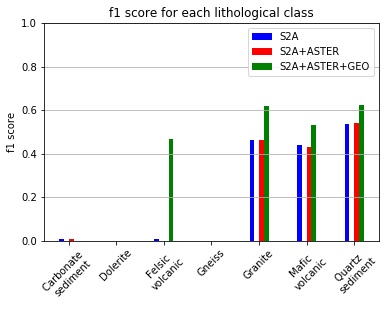

In [10]:
ax = plt.subplot(111)
plt.ylim(0., 1.)
ax.bar(np.arange(7)-0.15, fs1[2:], width=0.1, color='b', align='center', label='S2A')
ax.bar(np.arange(7)+0.05, fs2[2:], width=0.1, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(7)+0.15, fs3[2:], width=0.1, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(7), [cls_names[i] for i in np.unique(tst_Y)[2:]], rotation=45)
plt.ylabel('f1 score')
plt.gca().yaxis.grid(True)
plt.title('f1 score for each lithological class')
plt.legend()

In [14]:
def get_iou(precision, recall, support):
    intersection = support * recall
    preds_sup = intersection / precision
    preds_sup[precision == 0.0] = 0.0
    return intersection / (support + preds_sup - intersection)
iou1 = get_iou(pr1, re1, s1)
iou2 = get_iou(pr2, re2, s2)
iou3 = get_iou(pr3, re3, s3)

/Users/chenyz/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


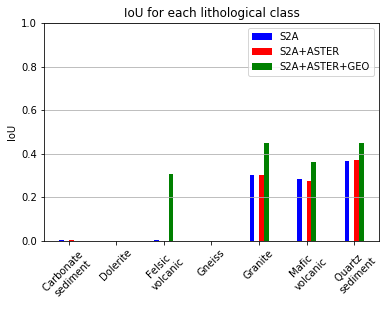

In [15]:
ax = plt.subplot(111)
plt.ylim(0., 1.)
ax.bar(np.arange(7)-0.15, iou1[2:], width=0.1, color='b', align='center', label='S2A')
ax.bar(np.arange(7)+0.05, iou2[2:], width=0.1, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(7)+0.15, iou3[2:], width=0.1, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(7), [cls_names[i] for i in np.unique(tst_Y)[2:]], rotation=45)
plt.ylabel('IoU')
plt.gca().yaxis.grid(True)
plt.title('IoU for each lithological class')
plt.legend()

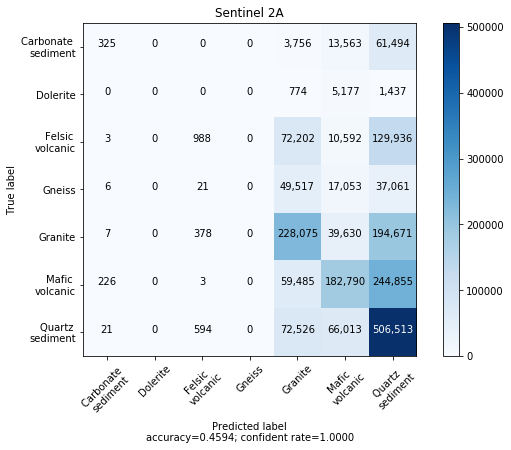

In [20]:
cm = metrics.confusion_matrix(tst_Y, p1, labels=np.unique(tst_Y)[2:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(tst_Y)[2:]], cr=1.,
                      normalize=False, title='Sentinel 2A')

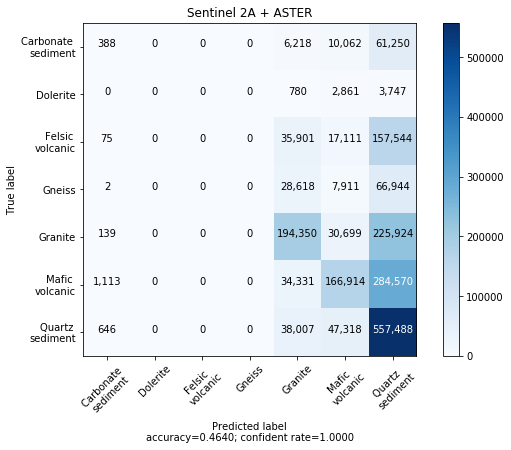

In [21]:
cm = metrics.confusion_matrix(tst_Y, p2, labels=np.unique(tst_Y)[2:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(tst_Y)[2:]], cr=1.,
                      normalize=False, title='Sentinel 2A + ASTER')

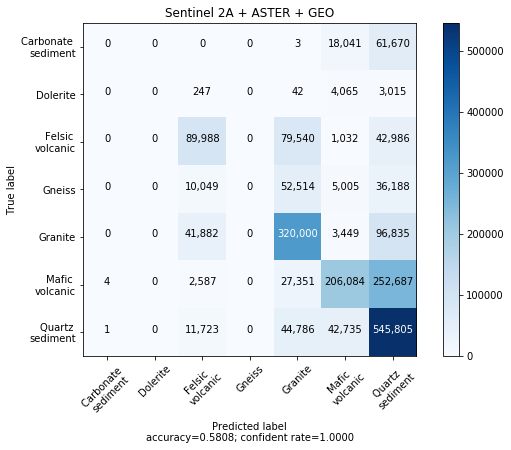

In [23]:
cm = metrics.confusion_matrix(tst_Y, p3, labels=np.unique(tst_Y)[2:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.unique(tst_Y)[2:]], cr=1.,
                      normalize=False, title='Sentinel 2A + ASTER + GEO')

#### SVM

In [46]:
clf = SVC(kernel='rbf')

In [51]:
clf.fit(trn_X[:, :], trn_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
p3 = clf.predict(tst_X[:, :])

In [22]:
clf.score(tst_X[:, :16], tst_Y)

0.42999999999999999

In [23]:
np.unique(tst_Y)

array([ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

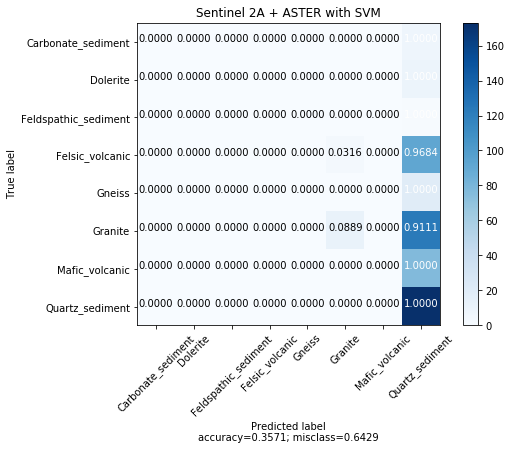

In [25]:
cm = metrics.confusion_matrix(tst_Y, preds, labels=np.asarray(np.unique(tst_Y), dtype=np.int)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.asarray(np.unique(tst_Y), dtype=np.int)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER with SVM')

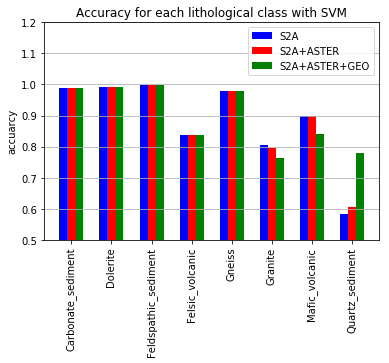

In [53]:
acc_cls_s = acc_cls(p1, tst_Y)
acc_cls_sa = acc_cls(p2, tst_Y)
acc_cls_sag = acc_cls(p3, tst_Y)
ax = plt.subplot(111)
plt.ylim(0.5, 1.2)
ax.bar(np.arange(8)-0.2, acc_cls_s[2:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(8), acc_cls_sa[2:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(8)+0.2, acc_cls_sag[2:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(8), cls_names[2:], rotation=90)
plt.ylabel('accuarcy')
plt.gca().yaxis.grid(True)
plt.title('Accuracy for each lithological class with SVM')
plt.legend()